In [28]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger, get_config
from tuxai.report import model_metrics, Report, FeatureImportanceReport

config_logger()
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100


# Yes frequencies

In [29]:
fir = FeatureImportanceReport(use_cache="fi_const_2023")

2023-02-10 10:43:12,330 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023
2023-02-10 10:43:12,330 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


In [30]:

df_ai = fir.options_always_importants(target="vmlinux", rank=99999, collinearity=True, merge_groups=False, allow_version_gap=True).set_index("options")
df = fir.add_yes_frequencies(df_ai, str_pct=False)
df

  0%|          | 0/12369 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08,freq 4.13,freq 4.15,freq 4.20,freq 5.00,freq 5.04,freq 5.07,freq 5.08
104_QUAD_8,128,419,48,38,60,96,77,0.054364,0.052276,0.103495,0.107408,0.060781,0.058336,0.061625
60XX_WDT,78,53,35,34,49,62,42,0.246818,0.247163,0.245775,0.245940,0.244284,0.251153,0.249646
"64BIT, ARCH_FLATMEM_ENABLE, ARCH_HAS_KCOV, ARCH_HAS_PMEM_API, ARCH_HAS_UACCESS_FLUSHCACHE, ARCH_HAS_ZONE_DEVICE, ARCH_SPARSEMEM_DEFAULT, ARCH_SUPPORTS_INT128, ARCH_SUPPORTS_NUMA_BALANCING, ARCH_USE_CMPXCHG_LOCKREF, ARCH_WANTS_THP_SWAP, ARCH_WANT_IPC_PARSE_VERSION, AUDIT_ARCH, CLKSRC_I8253, CLONE_BACKWARDS, GENERIC_CPU, HARDLOCKUP_CHECK_TIMESTAMP, HAVE_AOUT, HAVE_ARCH_SOFT_DIRTY, HAVE_ARCH_TRANSPARENT_HUGEPAGE_PUD, HAVE_ARCH_VMAP_STACK, HAVE_ATOMIC_IOMAP, HAVE_CONTEXT_TRACKING, HAVE_EBPF_JIT, HAVE_GENERIC_DMA_COHERENT, HAVE_IRQ_EXIT_ON_IRQ_STACK, HAVE_LIVEPATCH, HAVE_STACK_VALIDATION, HAVE_VIRT_CPU_ACCOUNTING_GEN, LEGACY_VSYSCALL_EMULATE, MODULES_USE_ELF_REL, MODULES_USE_ELF_RELA, OLD_SIGACTION, SPARSEMEM_ALLOC_MEM_MAP_TOGETHER, SPARSEMEM_EXTREME, SPARSEMEM_STATIC, SPARSEMEM_VMEMMAP_ENABLE, X86_32, X86_32_LAZY_GS, X86_64, X86_DEV_DMA_OPS, X86_USE_PPRO_CHECKSUM, ZONE_DMA32",3790,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.999665,NaN,NaN,NaN,NaN,NaN,NaN
6LOWPAN,89,488,71,55,222,63,38,0.065513,0.068017,0.066244,0.063753,0.064340,0.080510,0.083383
6LOWPAN_DEBUGFS,64,2034,457,1542,550,1595,115,0.053575,0.052835,0.052280,0.050321,0.053662,0.061213,0.061260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZX_DMA,4214,4408,4816,4928,5037,5355,5373,0.158629,0.157438,0.147942,0.143494,0.148412,0.155365,0.148109
ZX_I2S,7932,7894,8635,8644,9230,9738,9872,0.031287,0.030822,0.026949,0.034182,0.035749,0.034426,0.043425
ZX_SPDIF,3396,3608,4024,4067,4194,4393,4383,0.030434,0.030340,0.026651,0.033881,0.034356,0.033385,0.042786
ZX_TDM,7437,894,8208,8306,8337,797,802,0.060554,0.061137,0.053429,0.071822,0.069989,0.070043,0.091365


## Detect outliers + scores (+ ranks)

In [2]:
from tuxai.report import YesFrequencyOutliers

yfo = YesFrequencyOutliers()

yfo.get_dataframe(target="vmlinux", use_fir_cache="fi_const_2023")

2023-02-10 09:47:58,405 :: INFO :: tuxai.report :: loading feature importance data from cache: fi_const_2023


  0%|          | 0/12369 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08,freq 4.13,freq 4.15,freq 4.20,freq 5.00,freq 5.04,freq 5.07,freq 5.08,outliers_score,outliers
UBSAN_ALIGNMENT,8,8,7,8,9,9,9,0.166850,0.250946,0.238409,0.256265,0.748868,0.121931,0.126579,0.476033,[0.7488683406198011]
PINCTRL,8432,8526,9176,9311,9700,10168,10340,0.314805,0.659761,0.861850,0.882618,0.880721,0.882732,0.880901,0.451393,[0.3148052116419265]
PINMUX,5686,704,6392,6458,6732,7102,7160,0.314751,0.643385,0.854570,0.878508,0.877742,0.878317,0.870091,0.444872,[0.3147511937944297]
CEC_NOTIFIER,4736,4895,5381,5469,506,5857,5978,0.073421,0.213040,0.543531,0.550571,0.562154,0.568580,0.691967,0.384188,[0.07342105831766815]
VIDEO_V4L2_SUBDEV_API,5979,6132,6043,6114,7052,7448,7480,0.138804,0.137787,0.140236,0.139234,0.152358,0.146585,0.539935,0.340658,[0.5399352278429047]
PM_OPP,6756,6884,7494,836,7196,8322,8414,0.322314,0.633458,0.637362,0.637079,0.720200,0.816658,0.824796,0.333667,[0.3223136924439835]
RPMSG,492,5823,6317,6436,6651,7037,7099,0.268112,0.615178,0.623015,0.669006,0.661702,0.668138,0.667655,0.328003,[0.2681121842656814]
CRYPTO_SEQIV,5087,5229,5751,5817,5902,6245,6394,0.960643,0.969558,0.971646,0.971532,0.955469,0.953867,0.611778,0.301721,[0.6117775851845094]
PRIME_NUMBERS,216,107,792,783,853,5101,5102,0.262073,0.264377,0.257695,0.257468,0.255426,0.260182,0.594946,0.287494,[0.594945947178762]
MEDIA_CONTROLLER,8458,8628,9335,468,9815,10335,10527,0.285139,0.290451,0.294138,0.287039,0.314737,0.302793,0.602928,0.263325,[0.6029284313278293]


# Quantify feature importance with respect to kernel size

## Each target for 4.13

<AxesSubplot: >

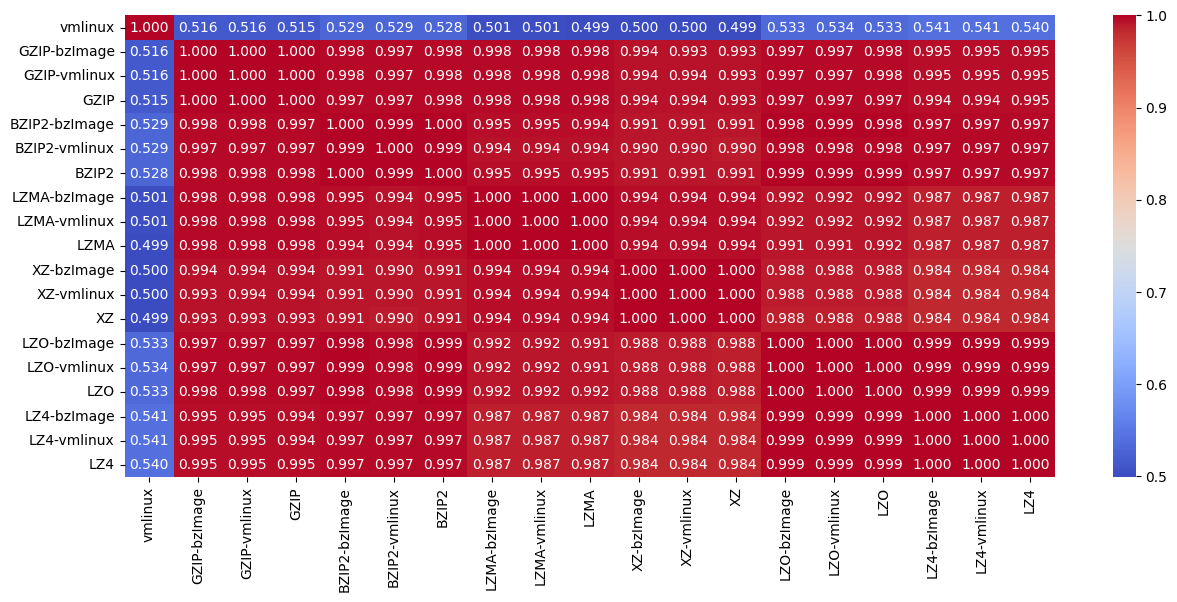

In [54]:
plt.figure(figsize=(15, 6))
df_413 = Dataset(413).get_dataframe(Columns.targets)
mat_413 = df_413.corr()
sns.heatmap(mat_413, annot=True, cmap="coolwarm", fmt=".3f")

## without vmlinux

<AxesSubplot: >

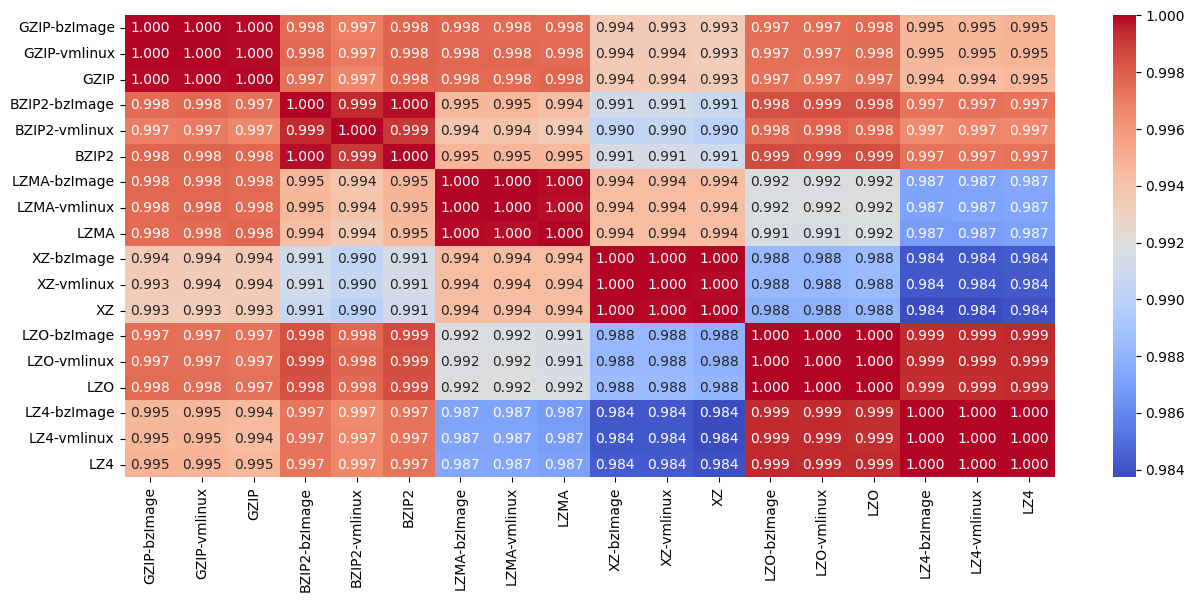

In [59]:
targets = list(df_413.columns)
targets.remove("vmlinux")
plt.figure(figsize=(15, 6))
df_413 = Dataset(413).get_dataframe(Columns.targets)[targets]
mat_413 = df_413.corr()
sns.heatmap(mat_413, annot=True, cmap="coolwarm", fmt=".3f")

## without vmlinux and duplicated compressed targets

In [60]:
versions = get_config()["report"]["versions"]
targets = [col for col in df_413.columns if not col.endswith("vmlinux") and not col.endswith("bzImage")]
mats = {
    version: Dataset(version).get_dataframe(Columns.targets)[targets].corr()
    for version in versions
    }

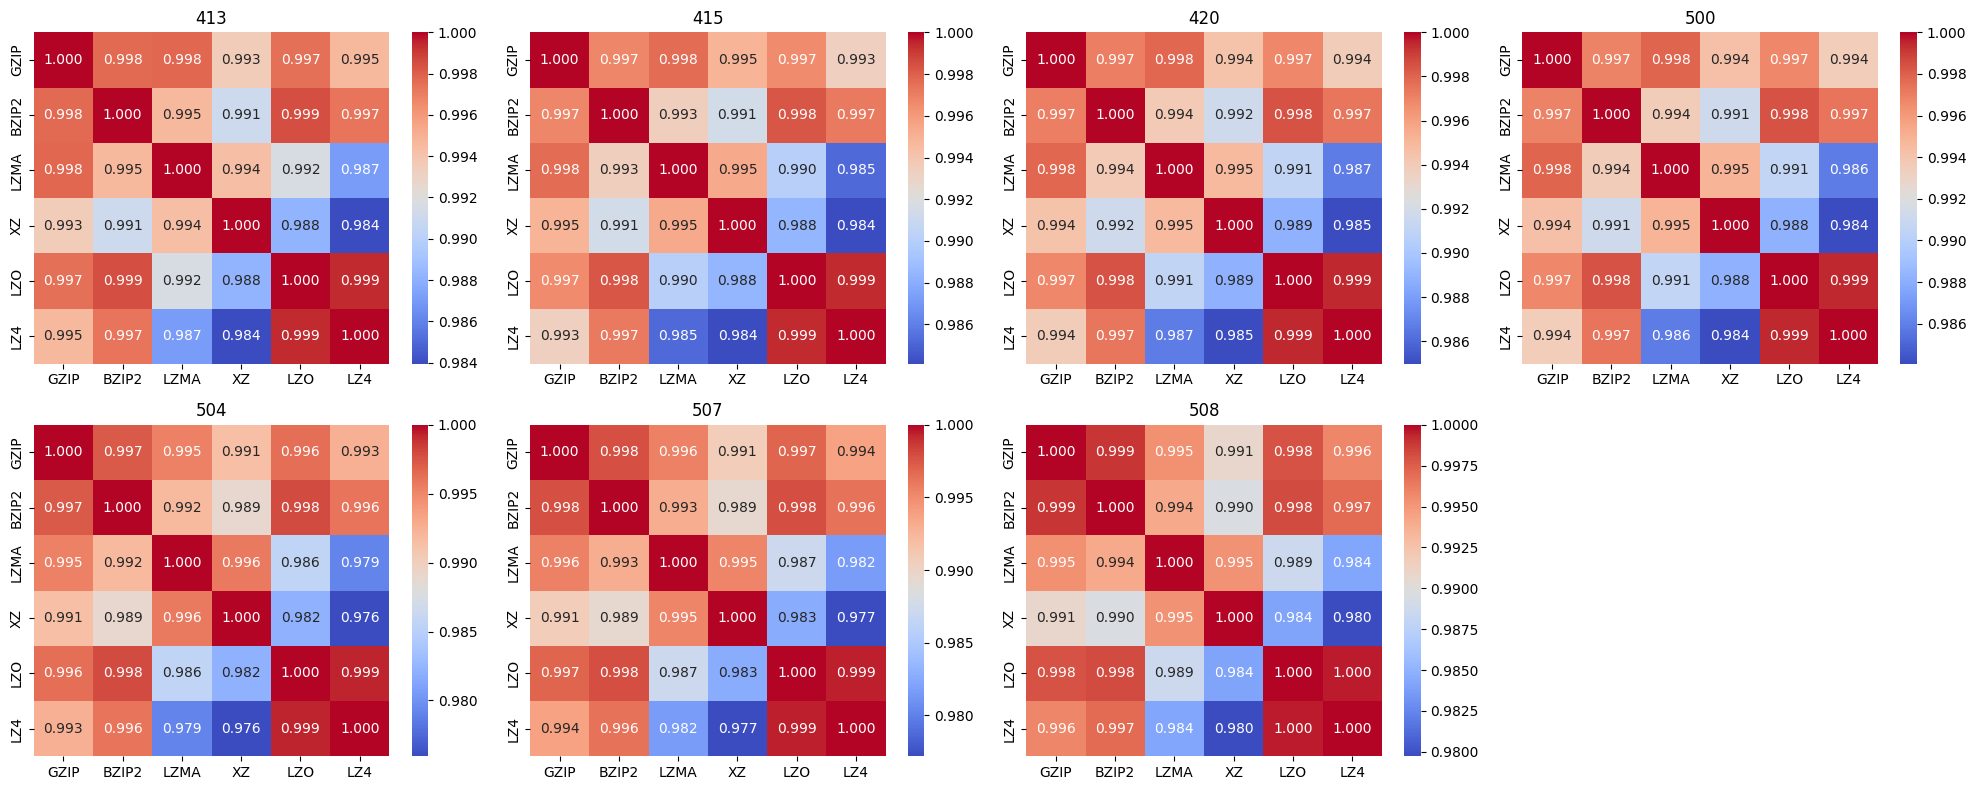

In [67]:

plt.figure(figsize=(20, 8))
for i, (version, mat) in enumerate(mats.items()):
    plt.subplot(1 + len(versions) // 4, 4, i + 1)
    plt.title(version)
    df = mats[version]
    sns.heatmap(mats[version], annot=True, fmt=".3f", cmap="coolwarm")
plt.tight_layout()

# Feature impact on kernel size (bigger or smaller kernel ?)

In [3]:
df_413_x = Dataset(413).get_dataframe(Columns.options)
df_413_y = Dataset(413).get_dataframe(Columns.targets)
df = df_413_x.copy()
df["vmlinux"] = df_413_y["vmlinux"]
df

,OPENVSWITCH,CORR|0001,NETFILTER_XT_MATCH_TCPMSS,MPLS,NFC_HCI,NETFILTER_XT_MATCH_TIME,NET_MPLS_GSO,NFC_SHDLC,NETFILTER_XT_MATCH_U32,OPENVSWITCH_GRE,...,APDS9960,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS,nb_yes,vmlinux
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,0.124740,47.895546
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,0.123932,15.888237
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,0.151074,41.085106
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,True,False,0.209286,25.998756
4,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,True,True,0.265304,56.046906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000116,6.978043
92558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000116,6.978043
92559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000116,6.978043
92560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.000116,6.978043


In [75]:
df[df["MPLS"]].vmlinux.mean(), df[~df["MPLS"]].vmlinux.mean()

(53.086554884300554, 44.56324919389001)

In [5]:
from tuxai.misc import cache
def get_sizes(version):
    key = f"size_diffs_dict_{version}"
    c = cache()
    if key in c:
        return c[key]
    else:
        df, groups = Dataset(version).get_dataframe(Columns.options,return_collinear_groups=True, add_features=False)
        features = df.columns    
        df["vmlinux"] = Dataset(version).get_dataframe(Columns.targets)["vmlinux"]
        sizes = dict()
        for feature in tqdm(features):
            try:
                yes_size = df[df[feature]].vmlinux.mean()
                no_size = df[~df[feature]].vmlinux.mean()
                group = ", ".join(groups[feature]) if feature in groups else feature
                sizes[group] = {"yes": yes_size, "no": no_size, "diff": yes_size - no_size}
            except KeyError:
                print(f"error: {feature}")
        c[key] = sizes
        return sizes

# build cache
# from tuxai.misc import get_config
# for version in get_config()["report"]["versions"]:
#     get_sizes(version)

In [6]:
pd.DataFrame.from_dict(get_sizes(413), orient="index").sort_values("diff", ascending=False)

,yes,no,diff
"USB_ETH, USB_ETH_EEM, USB_ETH_RNDIS",628.786148,47.328087,581.458061
DEBUG_INFO,166.142623,34.695495,131.447128
DEBUG_INFO_DWARF4,170.536440,41.141554,129.394887
GDB_SCRIPTS,167.322841,41.264468,126.058374
DRM_I915_GVT_KVMGT,160.015611,47.316105,112.699506
...,...,...,...
MOUSE_ATIXL,13.557725,47.335463,-33.777738
"TOUCHSCREEN_HTCPEN, SCSI_NCR53C406A",11.675198,47.334754,-35.659556
EISA_NAMES,10.987280,47.335154,-36.347874
HWBM,9.669811,47.334776,-37.664964


In [6]:
def plot_sizes(version, count=20):
    plt.figure(figsize=(10, 10))
    df = pd.DataFrame.from_dict(get_sizes(version), orient="index").sort_values("diff", ascending=False)
    df_more = df.head(count)
    df_less = df.tail(count)

    plt.subplot(2, 1, 1)


    plt.title("version")

    sns.set_color_codes("muted")
    sns.barplot(df_more, y=df_more.index, x="yes", color="r")
    sns.set_color_codes("pastel")
    sns.barplot(df_more, y=df_more.index, x="no", color="b")
    plt.title("Bigger")

    plt.subplot(2, 1, 2)
    sns.set_color_codes("pastel")
    sns.barplot(df_less, y=df_less.index, x="no", color="r")
    sns.set_color_codes("muted")
    sns.barplot(df_less, y=df_less.index, x="yes", color="b")
    plt.title("Smaller")
    plt.show()


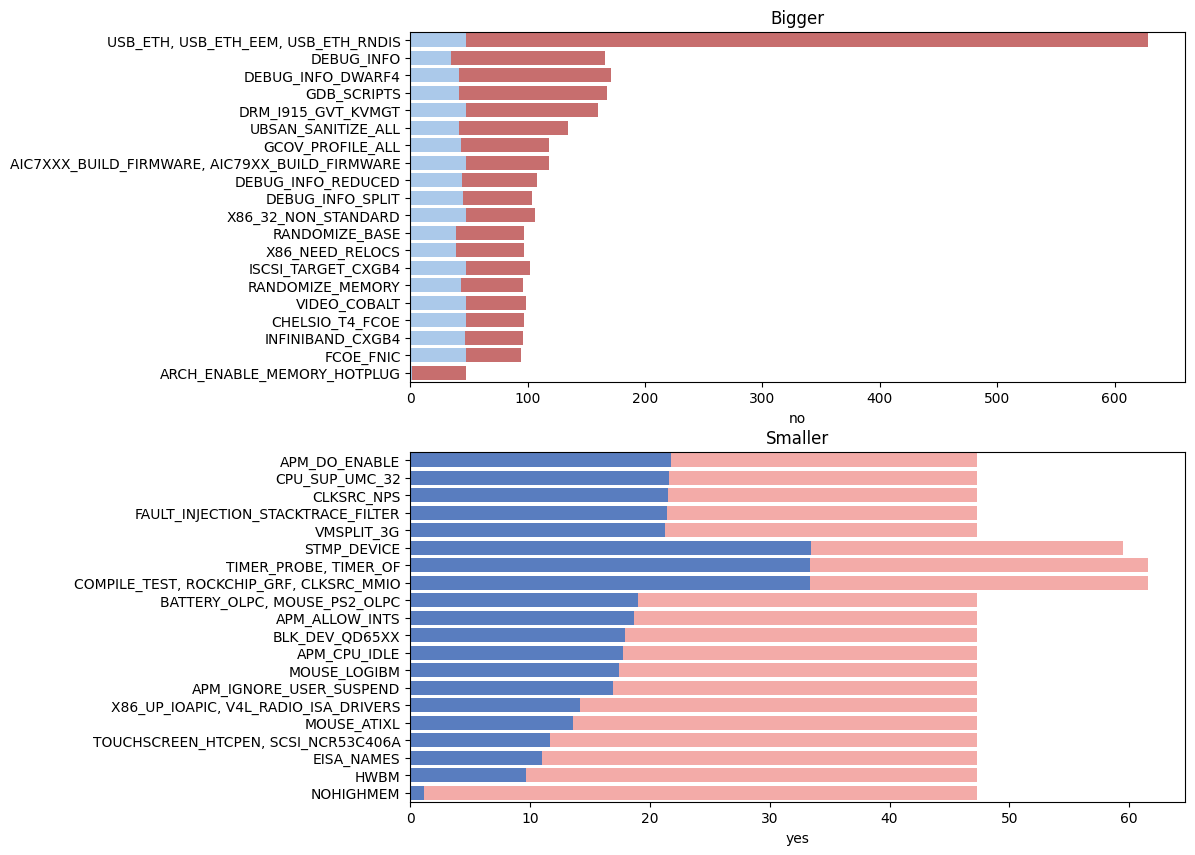

In [61]:
plot_sizes(413)

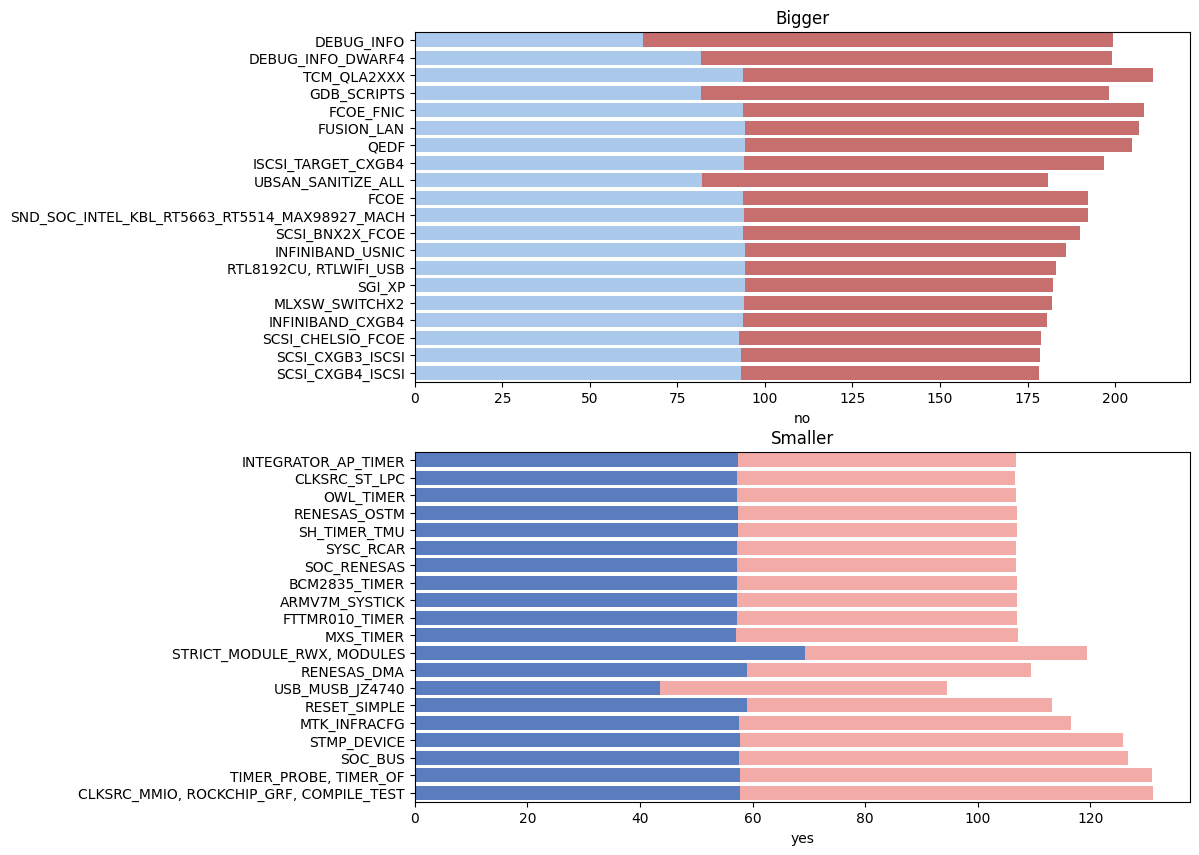

In [59]:
plot_sizes(415, 20)

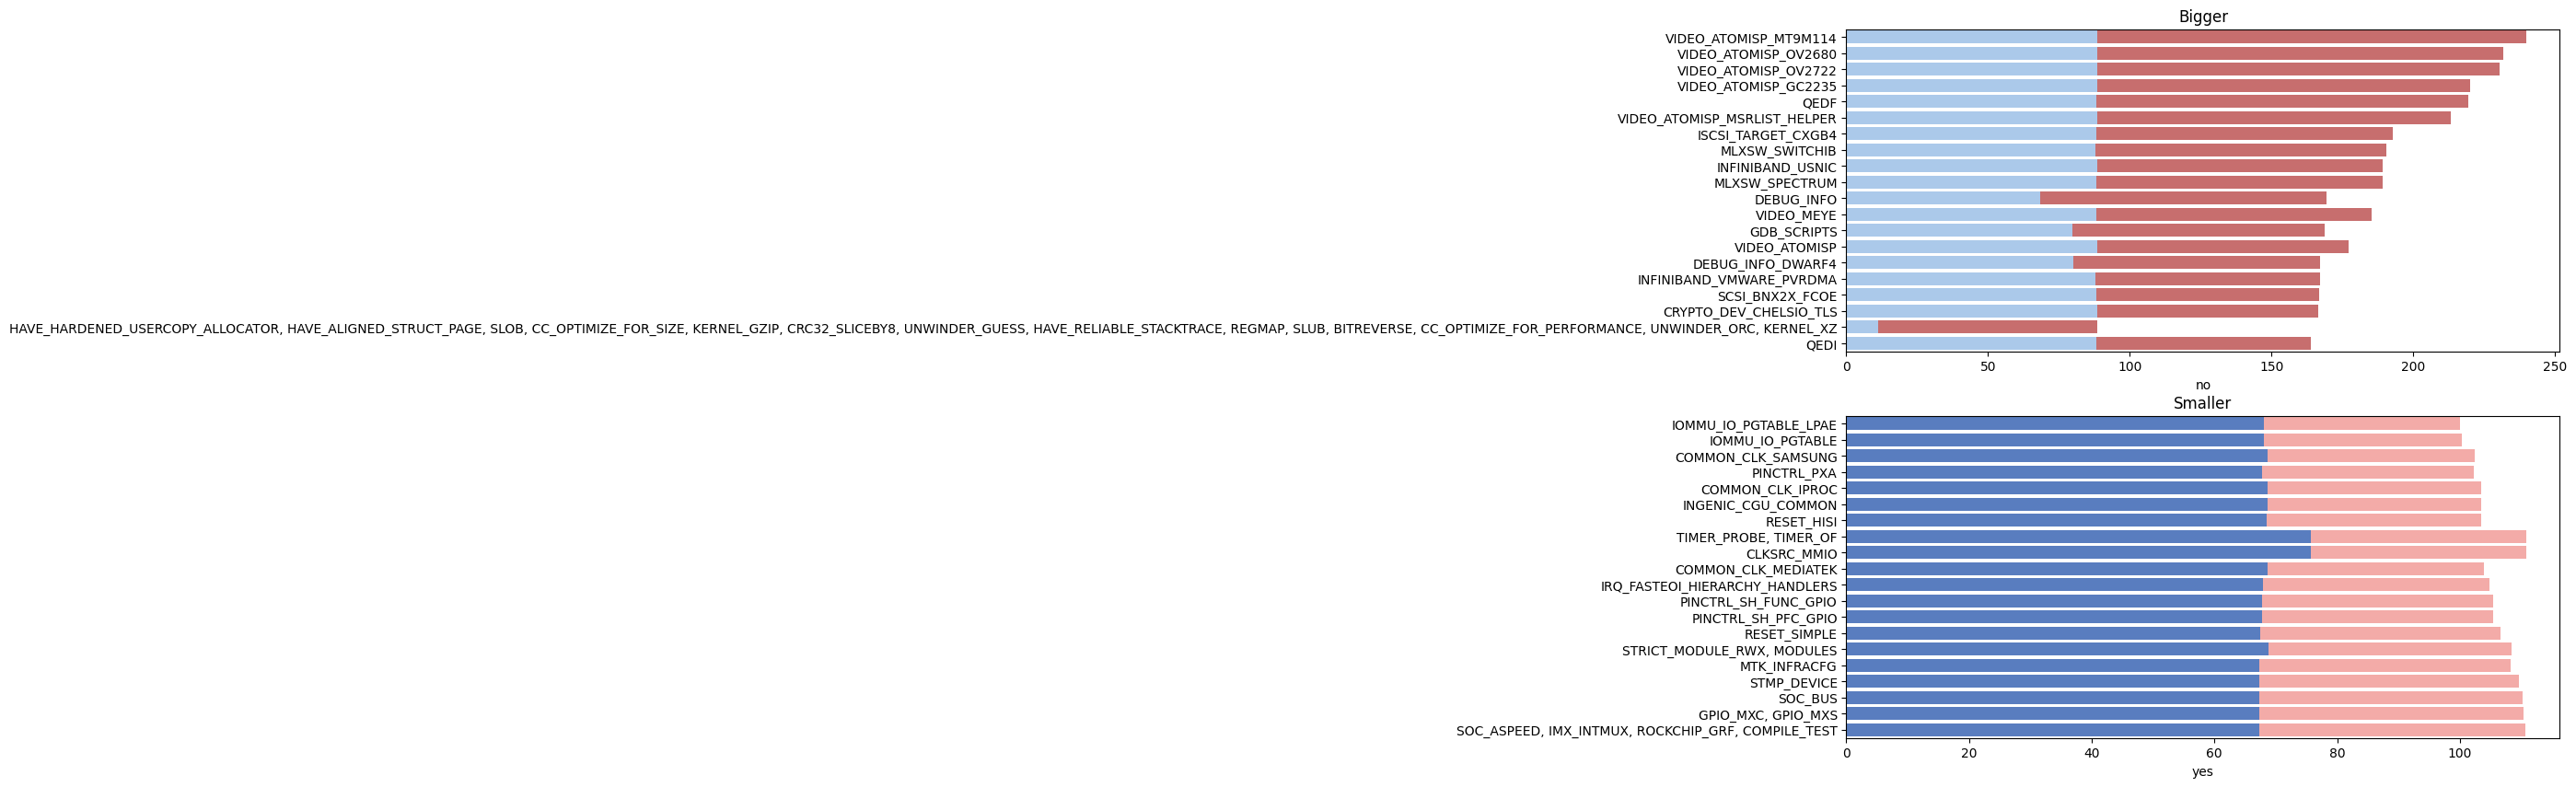

In [7]:
plot_sizes(508, 20)

In [11]:
df = pd.DataFrame.from_dict(get_sizes(507), orient="index").sort_values("diff", ascending=False)
df.head(50)

,yes,no,diff
LIBERTAS_THINFIRM_USB,249.358688,112.341471,137.017217
DEBUG_INFO,218.826504,85.748255,133.078250
WL1251_SPI,238.590317,112.338995,126.251321
CHELSIO_T4_FCOE,236.804201,112.560583,124.243618
RTL8723AE,236.325959,112.246873,124.079086
SCSI_BNX2X_FCOE,235.593381,111.947944,123.645437
MT76x0U,231.879594,112.174073,119.705521
DEBUG_INFO_DWARF4,219.017439,100.510366,118.507074
WIL6210,225.901805,111.740115,114.161689
GDB_SCRIPTS,215.106575,101.185890,113.920685


In [12]:
df.tail(50)

,yes,no,diff
OMAP_CONTROL_PHY,87.606240,127.314059,-39.707819
MTK_SCPSYS,83.102753,122.814127,-39.711374
INTEGRATOR_AP_TIMER,83.152378,122.868539,-39.716161
HISILICON_LPC,83.072394,122.800699,-39.728305
SOC_TEGRA20_VOLTAGE_COUPLER,83.151893,122.913763,-39.761870
"SYSC_RCAR, SOC_RENESAS",83.015128,122.804324,-39.789196
ATMEL_ST,82.990416,122.786274,-39.795858
INGENIC_TCU_IRQ,82.969598,122.806565,-39.836967
IRQ_UNIPHIER_AIDET,83.041210,122.901439,-39.860229
FSL_FTM_TIMER,82.992615,122.862333,-39.869718


In [38]:
df = Dataset(413).get_dataframe(group_collinear_options=False)

In [40]:
df["USB_ETH"].sum()

1

In [17]:
df_415.columns

Index(['NETFILTER_XT_MATCH_CONNMARK', 'NET_EMATCH', 'TOUCHSCREEN_AD7877',
       'REGULATOR_88PM8607', 'DVB_USB_CXUSB', 'CRYPTO_SHA512_MB',
       'NETFILTER_XT_MATCH_CONNTRACK', 'LAPBETHER', 'TOUCHSCREEN_AD7879',
       'REGULATOR_ACT8865',
       ...
       'XZ-vmlinux', 'XZ', 'LZO-bzImage', 'LZO-vmlinux', 'LZO', 'LZ4-bzImage',
       'LZ4-vmlinux', 'LZ4', 'cid', 'nb_yes'],
      dtype='object', length=9006)

# USB_ETH case

In [ ]:
fir = FeatureImportanceReport(use_cache="fi_const_2023")
df_ai = fir.options_always_importants(target="vmlinux", rank=99999, collinearity=True, merge_groups=False, allow_version_gap=True).set_index("options")
df = fir.add_yes_frequencies(df_ai, str_pct=False)


In [36]:
df[df.index.str.contains("USB_ETH")]

,4.13,4.15,4.20,5.00,5.04,5.07,5.08,freq 4.13,freq 4.15,freq 4.20,freq 5.00,freq 5.04,freq 5.07,freq 5.08
USB_ETH,<NA>,<NA>,<NA>,<NA>,<NA>,6875,6911,NaN,NaN,NaN,NaN,NaN,0.066521,0.068969
"USB_ETH, USB_ETH_EEM, USB_ETH_RNDIS",63,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.000011,NaN,NaN,NaN,NaN,NaN,NaN
USB_ETH_EEM,<NA>,<NA>,<NA>,<NA>,<NA>,7441,7500,NaN,NaN,NaN,NaN,NaN,0.053475,0.056698
USB_ETH_RNDIS,<NA>,<NA>,<NA>,<NA>,<NA>,3172,3130,NaN,NaN,NaN,NaN,NaN,0.054963,0.054646
